In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

### 1. データの読み込み
課題① Kickstarter Projects

In [3]:
df_kick = pd.read_csv("../4_kadai/kickstarter-projects/ks-projects-201801.csv")

# 表の表示
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
#統計値の表示
df_kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
#欠損値の確認
display(df_kick.count())
#nameとusd pledgedが欠損あり

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [6]:
#各列のデータタイプの確認
display(df_kick.dtypes)

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

■各データの内容確認  
ID                   ただのID  
name                 プロジェクト名  
category             プロジェクトの詳細カテゴリ  
main_category        プロジェクトの大カテゴリ  
currency             使用される通貨  
deadline             期限  
goal                 出資調達目標、この金額になったら成功  
launched             開始日  
pledged              現在の出資金  
state                プロジェクトの状態、結果、目的変数  
backers              支援者数  
country              プロジェクトが開かれた国  
usd pledged          集まった資金の米ドル換算  
usd_pledged_real     実際に差し入れた金額  
usd_goal_real        実際に調達できた金額

■プロジェクト開始後にわかるデータ  
pledged              現在の出資金  
state                プロジェクトの状態、結果、目的変数  
backers              支援者数  
usd pledged          差し入れた金額  
usd_pledged_real     実際に差し入れた金額  
usd_goal_real        実際に調達できた金額


In [7]:
#不要そうな項目を削除
df_kick = df_kick.drop("ID", axis=1)
df_kick = df_kick.drop("name", axis=1)
df_kick = df_kick.drop("category", axis=1)

#プロジェクトスタート後にわかる説明変数は削除
df_kick = df_kick.drop("pledged", axis=1)
df_kick = df_kick.drop("backers", axis=1)
df_kick = df_kick.drop("usd pledged", axis=1)
df_kick = df_kick.drop("usd_pledged_real", axis=1)
df_kick = df_kick.drop("usd_goal_real", axis=1)

In [8]:
#開始日、終了日から期間を求める。
df_kick['deadline'] = pd.to_datetime(df_kick['deadline'], errors = 'coerce')
df_kick['launched'] = pd.to_datetime(df_kick['launched'], errors = 'coerce')

df_kick['period'] = (df_kick['deadline'] - df_kick['launched']).dt.days

#不要になったdeadlineとlaunchedの列を削除します。
df_kick = df_kick.drop(['deadline', 'launched'], axis=1)

In [9]:
#目的変数となりうるstateの要素数確認
df_kick['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

([<matplotlib.patches.Wedge at 0x171c47d87b8>,
 [Text(-0.07649376129477893, 1.0973370970139384, 'failed'),
  Text(-0.3462605350310922, -1.044080285169671, 'successful'),
  Text(0.986674636517877, -0.4862850621315808, 'canceled'),
  Text(1.093752722911005, -0.11706827548385161, 'undefined'),
  Text(1.098405301198548, -0.05920974834372436, 'live'),
  Text(1.0998709930345154, -0.016846325453019517, 'suspended')],
 [Text(-0.04172386979715214, 0.5985475074621481, '52.2%'),
  Text(-0.18886938274423212, -0.5694983373652751, '35.4%'),
  Text(0.5381861653733874, -0.26524639752631674, '10.2%'),
  Text(0.5965923943150935, -0.06385542299119178, '0.9%'),
  Text(0.599130164290117, -0.032296226369304196, '0.7%'),
  Text(0.5999296325642811, -0.0091889047925561, '0.5%')])

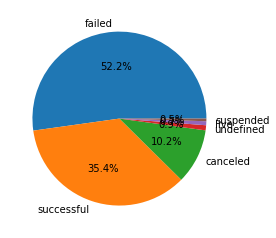

In [10]:
#要素の割合を円グラフで表示
plt.pie(df_kick['state'].value_counts(),autopct="%.1f%%", labels=df_kick['state'].value_counts().keys())

In [11]:
#ロジスティック回帰は2分割なので成功と失敗のみを抽出
df_kick_success = df_kick[df_kick['state']=='successful']
df_kick_failed =  df_kick[df_kick['state']=='failed']

#2つのデータを縦結合
df_kick_status = pd.concat([df_kick_success,df_kick_failed])

In [12]:
#カテゴリデータのダミー数値化
#df_kick_status = pd.get_dummies(df_kick_status)
#しようとしたけどメモリエラーが発生
#ほかの方法を試す

In [13]:
#カテゴリ変数を数値に置き換える
le = LabelEncoder()
#main_category
le = le.fit(df_kick_status['main_category'])
df_kick_status['main_category'] = le.transform(df_kick_status['main_category'])
#currency
le = le.fit(df_kick_status['currency'])
df_kick_status['currency'] = le.transform(df_kick_status['currency'])
#state
le = le.fit(df_kick_status['state'])
df_kick_status['state'] = le.transform(df_kick_status['state'])
#country
le = le.fit(df_kick_status['country'])
df_kick_status['country'] = le.transform(df_kick_status['country'])

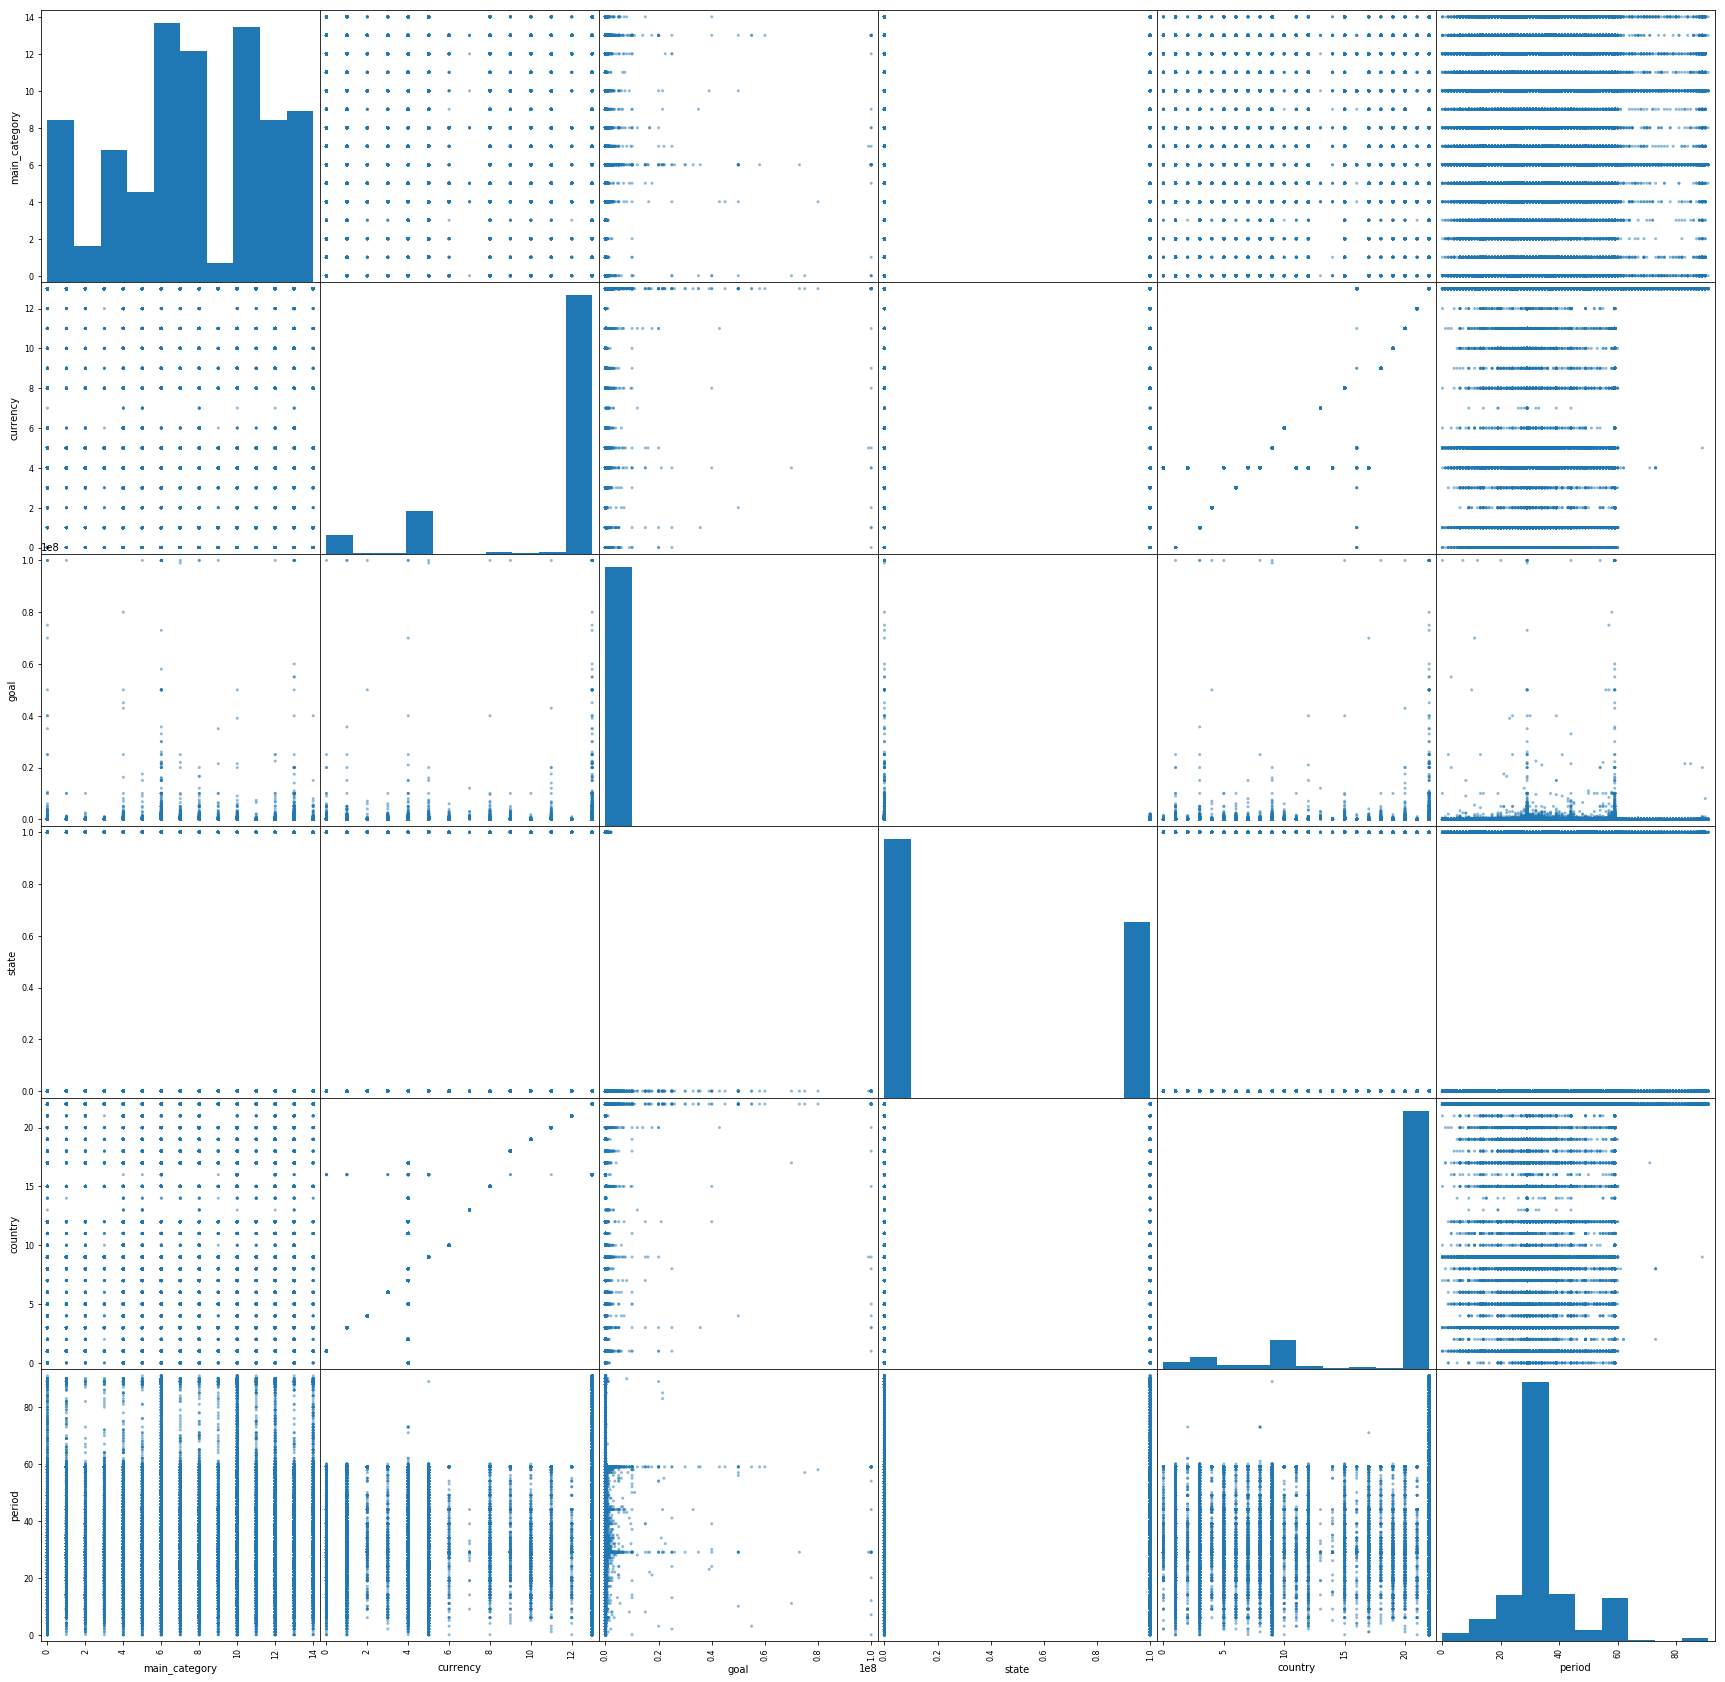

<Figure size 432x288 with 0 Axes>

In [14]:
#散布図行列を書いてみる
#処理重いよ
pd.plotting.scatter_matrix(df_kick_status, figsize=(30,30))
plt.show()
plt.savefig("1.png")

散布行列よりstateと相関がある(分布に偏りがある)のは
goal

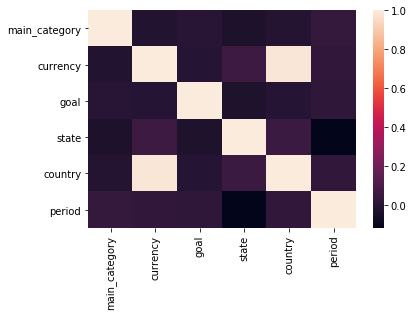

In [15]:
sns.heatmap(df_kick_status.corr())
plt.show()

ヒートマップよりstateと相関があるのは、category,currency,country  
あれ？goalの相関がない。  
5つの説明変数で求めていく。

In [16]:
y = df_kick_status["state"].values
X = df_kick_status.drop('state', axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}'.format(w0, w1, w2, w3, w4, w5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


w0 = 899.389, w1 = 0.250, w2 = -46.178, w3 = -0.112, w4 = 60.443, w5 = -14.969


w3が0に近いので除外してもいい説明変数といえる。

■識別精度を確認

In [18]:
#混同行列
# ラベルを予測
y_pred = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_pred)))

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

対数尤度 = -14.984
正答率（Accuracy） = 56.617%
適合率（Precision） = 72.103%
再現率（Recall） = 44.405%
F1値（F1-score） = 54.962%


正答率は56%と低い。  
何の情報もなければ50%だった確率から6%上がったともいえる。

In [19]:
# 予測値と正解のクロス集計（混同行列）
conf_mat = confusion_matrix(y, y_pred)
conf_mat = pd.DataFrame(conf_mat, 
                        index=['正解 = failed', '正解 = successful'], 
                        columns=['予測 = failed', '予測 = successful'])
conf_mat

,予測 = failed,予測 = successful
正解 = failed,87798,109921
正解 = successful,33969,99987
